In [1]:
import pandas as pd 
import numpy  as np 
import yfinance as yf 
import matplotlib.pyplot as pyplot 

In [26]:
stocks = yf.download(['MSFT','TSLA','NVDA','META'], start = "2019-10-18", end = "2024-10-18")

[*********************100%***********************]  4 of 4 completed


In [27]:
stocksData = stocks.loc[:,"Close"].copy() #df.loc[rows, columns]
stocksData.head()

Ticker,META,MSFT,NVDA,TSLA
Date,,,,
2019-10-18 00:00:00+00:00,185.850006,137.410004,4.76225,17.129999
2019-10-21 00:00:00+00:00,189.759995,138.429993,4.90025,16.900000
2019-10-22 00:00:00+00:00,182.339996,136.369995,4.89025,17.038668
2019-10-23 00:00:00+00:00,186.149994,137.240005,4.87725,16.978666
2019-10-24 00:00:00+00:00,186.380005,139.940002,4.92150,19.978666


<Axes: xlabel='Date'>

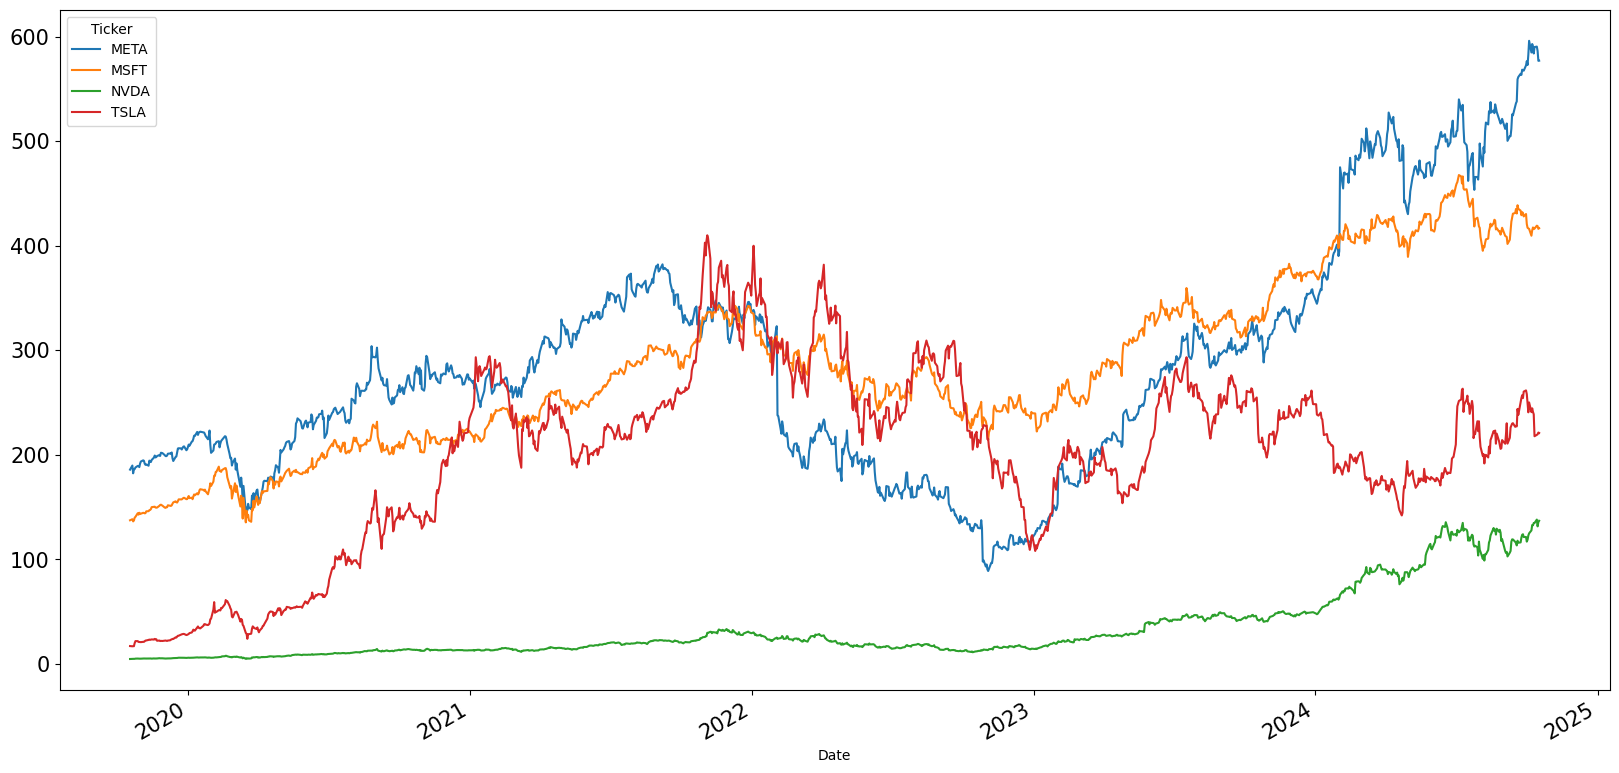

In [28]:
stocksData.plot(figsize = (20,10), fontsize = 15)
#pyplot.style.use("classic")
#pyplot.show()
# my theory is that TSLA is in another currency as the values are less but the % change is the same 

In [29]:
stocksData.pct_change()

Ticker,META,MSFT,NVDA,TSLA
Date,,,,
2019-10-18 00:00:00+00:00,NaN,NaN,NaN,NaN
2019-10-21 00:00:00+00:00,0.021038,0.007423,0.028978,-0.013427
2019-10-22 00:00:00+00:00,-0.039102,-0.014881,-0.002041,0.008205
2019-10-23 00:00:00+00:00,0.020895,0.006380,-0.002658,-0.003521
2019-10-24 00:00:00+00:00,0.001236,0.019674,0.009073,0.176692
...,...,...,...,...
2024-10-11 00:00:00+00:00,0.010482,0.001154,-0.000074,-0.087825
2024-10-14 00:00:00+00:00,0.000797,0.006774,0.024258,0.006244
2024-10-15 00:00:00+00:00,-0.007029,-0.000954,-0.046860,0.001871


In [30]:
data = stocksData.pct_change().dropna()
data

Ticker,META,MSFT,NVDA,TSLA
Date,,,,
2019-10-21 00:00:00+00:00,0.021038,0.007423,0.028978,-0.013427
2019-10-22 00:00:00+00:00,-0.039102,-0.014881,-0.002041,0.008205
2019-10-23 00:00:00+00:00,0.020895,0.006380,-0.002658,-0.003521
2019-10-24 00:00:00+00:00,0.001236,0.019674,0.009073,0.176692
2019-10-25 00:00:00+00:00,0.008102,0.005645,0.039012,0.094935
...,...,...,...,...
2024-10-11 00:00:00+00:00,0.010482,0.001154,-0.000074,-0.087825
2024-10-14 00:00:00+00:00,0.000797,0.006774,0.024258,0.006244
2024-10-15 00:00:00+00:00,-0.007029,-0.000954,-0.046860,0.001871


In [31]:
data = data.describe().T.loc[:,["mean","std"]] # T is a transposition function
data

,mean,std
Ticker,,
META,0.001304,0.028183
MSFT,0.001065,0.019072
NVDA,0.003242,0.033808
TSLA,0.002897,0.041560


In [32]:
# the stock market is only open for 251 days out of the year there are 
# higher std means more volatile
# 
data["mean"] = data["mean"] * 251  
data["std"] = data["std"] * np.sqrt(251) 
data

,mean,std
Ticker,,
META,0.327237,0.446506
MSFT,0.267279,0.302161
NVDA,0.813642,0.535620
TSLA,0.727238,0.658442
